<a href="https://colab.research.google.com/github/Ms-Ainebyona/Text-clustering/blob/main/CORPUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/DATA/DATA.csv',encoding='latin-1')

In [5]:
dataset.shape

(4969, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  4969 non-null   int64 
 1   Comment     4968 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.8+ KB


In [8]:
dataset.head(10)

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
5,53,Activities well completed
6,54,finished on time
7,55,The student's weekly progress was justifiably ...
8,56,Noted
9,57,She found this very interesting as she was abl...


In [ ]:
dataset.dropna(subset=["Comment"], inplace=True)

In [ ]:
dataset.shape

(4968, 2)

In [ ]:
#import the inflect library
import inflect
p = inflect.engine()
 
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str=['Comment']
    temp_str = text.split()
    # initialise empty list
    new_string = []
 
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        # append the word as it is
        else:
            new_string.append(word)
 
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str
 

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Lets do some text cleanup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 

    #replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)
    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)    
    # remove any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 ))#and len(word) <= 21))

    # Stemming the words
   # text = ' '.join([stemmer.stem(word) for word in text.split()])
    text=text.strip()
    
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
   #lemmatizing the words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
  
# convert text into word_tokens with their tags
def pos_tagging(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

In [ ]:

# import the inflect library
import inflect
p = inflect.engine()
 
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
 
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        # append the word as it is
        else:
            new_string.append(word)
 
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str
 


In [ ]:
dataset["Comment"] = dataset["Comment"].apply(clean_text,convert_number)

In [ ]:
dataset

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,faith exhibited enthusiasm taking project hand...
2,49,understood structure grails different componen...
3,50,intern oriented ict setup infrastructure sorot...
4,52,student oriented organization structure develo...
...,...,...
4964,8163,need get place work project outside office tim...
4965,8186,week orientation systems training first line c...
4966,8187,student performed tasks satisfaction
4967,8188,student performed tasks satisfaction


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#dataset["Comment"] = dataset["Comment"].apply(lemmatize_word)

In [ ]:
dataset.head()

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,faith exhibited enthusiasm taking project hand...
2,49,understood structure grails different componen...
3,50,intern oriented ict setup infrastructure sorot...
4,52,student oriented organization structure develo...


In [ ]:
#lemmas=(dataset['Comment'])

In [ ]:
#lemmas

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents=dataset['Comment'].values.astype("U")
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(documents)

In [ ]:
import matplotlib.pyplot as plt
k=500
from sklearn.cluster import KMeans

score = []
for i in range(1,k + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1,k + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

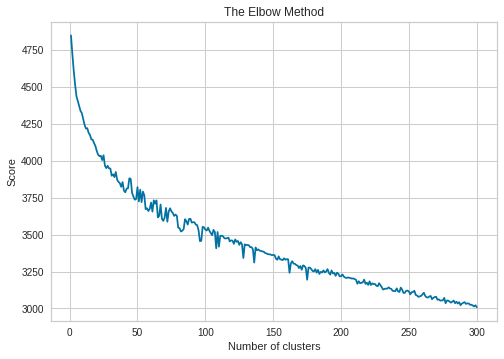

In [ ]:
import matplotlib.pyplot as plt
k=300
from sklearn.cluster import KMeans

score = []
for i in range(1,k + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1,k + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [ ]:
k=5
model = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=100,tol=0.000001, random_state=42)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=20, random_state=42, tol=1e-06)

In [ ]:
clusters = model.predict(X)


In [ ]:
dataset['cluster']=model.labels_

In [ ]:
clusters=dataset.groupby('cluster')
for cluster in clusters.groups:
  f=open('cluster'+str(cluster)+'.csv','w') #create csv file
  data=clusters.get_group(cluster)[['Comment']] #get colunm
  f.write(data.to_csv(index_label='id'))
  f.close()

In [ ]:
clusters.head()

,comment_id,Comment,cluster
0,5,djfjkdfjkjkffdk edited,0
1,41,faith exhibited enthusiasm taking project hand...,0
2,49,understood structure grails different componen...,0
3,50,intern oriented ict setup infrastructure sorot...,0
4,52,student oriented organization structure develo...,0
5,53,activities well completed,2
14,68,activity took time completed completed satisfa...,2
19,96,noted tasks completed,2
28,144,good attitude resilience good start,3
30,148,good progress expect student work together period,3


In [ ]:
clusters.tail()

,comment_id,Comment,cluster
4733,7605,progressive,4
4869,7934,progressive,4
4876,7945,progressive,4
4877,7953,task successfully completed,2
4894,7994,good job,3
4901,8013,keep good work,3
4903,8017,good progress,3
4904,8018,sadat managed complete internship supposed pre...,1
4906,8020,progressive,4
4907,8027,good,3


In [ ]:
print("cluster centroids:\n")
order_centroids=model.cluster_centers_.argsort()[:, :: -1]
terms=vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 30 feature terms of each cluster
        # print(j)
        print (' %s' % terms[j])
    print('------------')

cluster centroids:

Cluster 0:
 good
 work
 encourage
 time
 week
 internship
 tasks
 student
 team
 able
------------
Cluster 1:
 internship
 explaining
 supposed
 acquired
 report
 end
 skills
 new
 finished
 present
------------
Cluster 2:
 completed
 weeks
 tasks
 successfully
 challenges
 equip
 handson
 competence
 going
 main
------------
Cluster 3:
 good
 progress
 work
 ui
 student
 job
 start
 administration
 tasks
 systems
------------
Cluster 4:
 progressive
 tasks
 hand
 week
 technically
 recordings
 installations
 networking
 systems
 development
------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("\n")
print("Prediction")



Prediction


In [ ]:

Y = vectorizer.transform(["satisfactorily completed"])
prediction = model.predict(Y)
print(prediction)

[2]


In [ ]:
cluster_to_category = {}
for cat in dataset['cluster'].unique():
    mark = dataset['cluster'] == cat
    top = dataset[mark]['cluster'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category

0:
 Top cluster number: 0, Number of samples: 3967
2:
 Top cluster number: 2, Number of samples: 474
3:
 Top cluster number: 3, Number of samples: 171
4:
 Top cluster number: 4, Number of samples: 175
1:
 Top cluster number: 1, Number of samples: 181

Map cluster number to category:


{0: 0, 2: 2, 3: 3, 4: 4, 1: 1}

In [ ]:
dataset['clustered_category'] = dataset['cluster'].map(cluster_to_category)
dataset.head(10)

,comment_id,Comment,cluster,clustered_category
0,5,djfjkdfjkjkffdk edited,0,0
1,41,faith exhibited enthusiasm taking project hand...,0,0
2,49,understood structure grails different componen...,0,0
3,50,intern oriented ict setup infrastructure sorot...,0,0
4,52,student oriented organization structure develo...,0,0
5,53,activities well completed,2,2
6,54,finished time,0,0
7,55,students weekly progress justifiably good char...,0,0
8,56,noted,0,0
9,57,found interesting able identify know problems ...,0,0


In [ ]:

Y = vectorizer.transform(["good person."])
prediction = model.predict(Y)
print(prediction)

[3]


In [ ]:
print('Accuracy of clustered categories:', np.mean(dataset['cluster'] == dataset['clustered_category']))

Accuracy of clustered categories: 1.0


In [ ]:
dataset['clustered_category'].replace({0:'Excellent',1:'Neutral',2:'Good',3:'Poor',4:'Very poor'},inplace=True)

In [ ]:
dataset.tail(50)

,comment_id,Comment,cluster,clustered_category
4919,8068,aweebwa successfully implemented file upload d...,0,Excellent
4920,8069,samuel started internship going equip handson ...,0,Excellent
4921,8070,ahmed managed complete internship supposed pre...,1,Neutral
4922,8071,habibah started internship going equip handson...,2,Good
4923,8072,successfully completed weeks tasks,2,Good
4924,8073,habibah almost done internship encourage use r...,0,Excellent
4925,8075,managed complete tasks introduced opensource m...,0,Excellent
4926,8076,anjellinah fully closed tasks assigned interns...,0,Excellent
4927,8077,student gradually improving abiding instructio...,0,Excellent
4928,8078,student gradually improving abiding instructio...,0,Excellent


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
feature_pca = pca.fit_transform(X.toarray())
feature_pca.shape

In [ ]:
feature_pca

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Standardize the data
# Plot the clustered data
#fig, ax = plt.subplots(figsize=(6, 6))
#plt.scatter(X[cluster.labels == 0, 0], X[cluster.labels == 0, 1],
 #           c='green', label='cluster 1')
#plt.scatter(X[cluster.labels == 1, 0], X[cluster.labels == 1, 1],
            c='blue', label='cluster 2')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
#plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [ ]:
import plotly.express as px

In [ ]:
sentiment = dataset["clustered_category"].value_counts()
fig = px.pie(values=sentiment.values, 
             names=sentiment.index,
             color_discrete_sequence=px.colors.sequential.Reds)
fig.update_traces(textposition='inside',
                  textfont_size=10,
                  textinfo='percent+label')
fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=11, 
                  uniformtext_mode='hide')

fig.show()

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
# Calculate Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
#Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.097


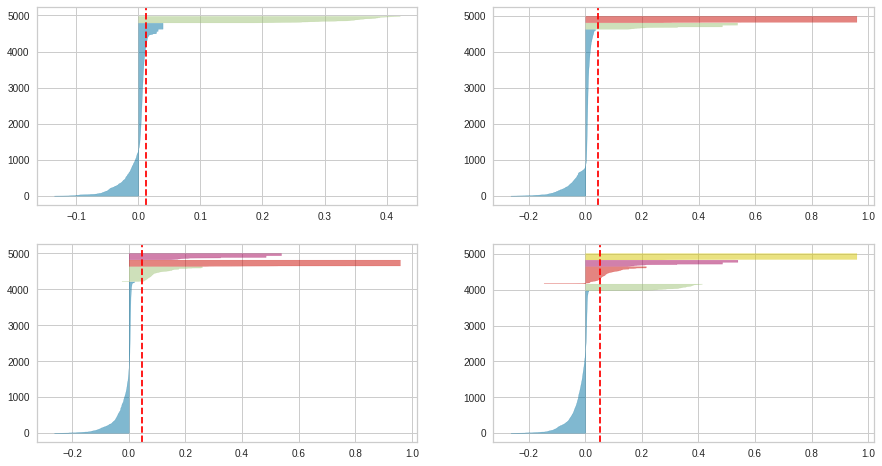

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)